In [1]:
 %config Completer.use_jedi = False 

In [1]:
import torch
from modules.dataset_3DPW import ImageWise3DPW, get_train_val_data
from modules.utils.data_utils import get_relevant_keypoints
from modules.utils.image_utils import plot_tensor
from modules.utils.image_utils import to_tensor, visualize_mesh
from PIL import Image

### Use Zarr to save processed Images

In [2]:
from modules.utils.zarr_imgs import save_img_zarr

In [ ]:
img_zarr = save_img_zarr(root_path='../3DPW', zarr_path=None, num_required_keypoints=8, split='train')

../../data/imgs_3dpw_8_kps_train.zarr


  0%|          | 3/22727 [00:06<16:02:18,  2.54s/it]

### Dataset: 3DPW

In [3]:
train_data, val_data = get_train_val_data(data_path='../3DPW', 
                       num_required_keypoints=8, 
                       store_sequences=True,
                       store_images=False,
                       load_from_zarr_trn = "data/imgs_3dpw_test.zarr",
                       load_from_zarr_val = "data/imgs_3dpw_test.zarr",
                                         )

In [4]:
train_data.image_paths = train_data.image_paths[:300]
train_data.person_ids = train_data.person_ids[:300]

In [5]:
loader_trn = torch.utils.data.DataLoader(
        dataset=train_data,
        batch_size=16,
        shuffle=True,)


In [6]:
for i, batch in enumerate(loader_trn):
    print(train_data.timers)

{'load_sequence': 0.000640869140625, 'load_image': 8.511543273925781e-05, 'out': 0.0008144378662109375}
{'load_sequence': 0.0020656585693359375, 'load_image': 0.00030493736267089844, 'out': 0.0035448074340820312}
{'load_sequence': 0.004025459289550781, 'load_image': 0.0004379749298095703, 'out': 0.006006479263305664}
{'load_sequence': 0.005200862884521484, 'load_image': 0.0005593299865722656, 'out': 0.010629415512084961}
{'load_sequence': 0.006291866302490234, 'load_image': 0.0006339550018310547, 'out': 0.0126190185546875}
{'load_sequence': 0.007279396057128906, 'load_image': 0.0007224082946777344, 'out': 0.014081239700317383}
{'load_sequence': 0.007847070693969727, 'load_image': 0.0007703304290771484, 'out': 0.014944076538085938}
{'load_sequence': 0.00867462158203125, 'load_image': 0.0008203983306884766, 'out': 0.01582479476928711}
{'load_sequence': 0.009608268737792969, 'load_image': 0.0009074211120605469, 'out': 0.01726818084716797}
{'load_sequence': 0.010691642761230469, 'load_imag

In [7]:
train_iter = iter(loader_trn)

In [8]:
data = next(train_iter)
img = data['img']
betas = data['betas']
poses = data['poses']
poses2d = data['poses2d']
cam_pose = data['cam_pose']
cam_intr = data['cam_intr']
trans = data['trans']
poses3d = data['poses3d']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


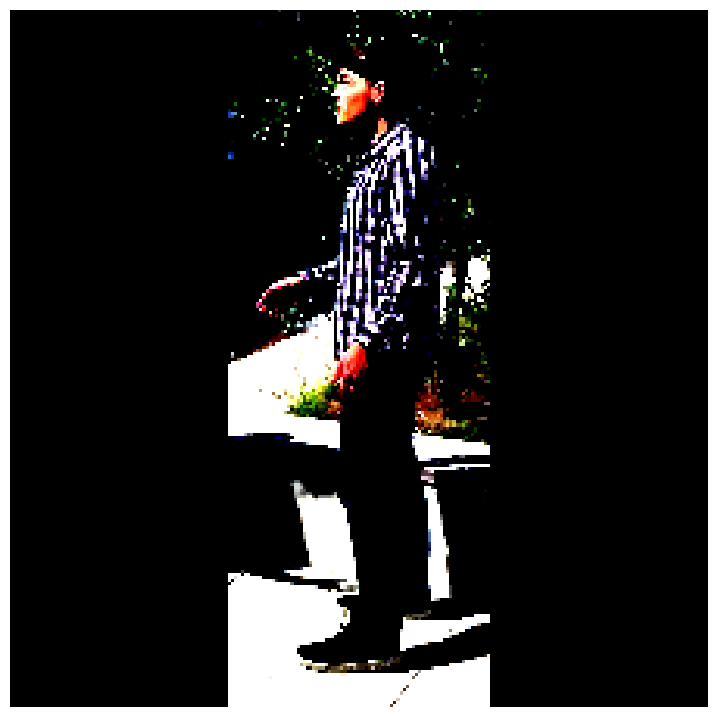

In [9]:
plot_tensor(img[0])

In [10]:
print(img.shape, betas.shape, poses.shape, poses2d.shape, cam_pose.shape)

torch.Size([16, 3, 224, 224]) torch.Size([16, 10]) torch.Size([16, 72]) torch.Size([16, 3, 18]) torch.Size([16, 4, 4])


#### Concat Datasets

In [ ]:
class ConcatDatasets(torch.utils.data.Dataset)
    def __init__(self, *datasets):
        self.datasets = datasets
        sum_length = 0
        self.accumulated_lens = [0]
        for dataset in datasets:
            sum_length += len(dataset)
            self.accumulated_lens.append(sum_length)
    
    def __get_item__(self, index):
        for i, accumulated_len in enumerate(self.accumulated_lens):
            if accumulated_len > index:
                return self.datasets[i][index-self.accumulated_lens[i-1]+1]
    
    def __len__(self):
        return accumulated_lens[-1]        

### Model

In [11]:
from modules.models import get_model
#from start_train import start_training

In [12]:
model = get_model()

In [13]:
model

PoseNetXtreme(
  (encoder): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
    

### Visualization

1920 1080
6890


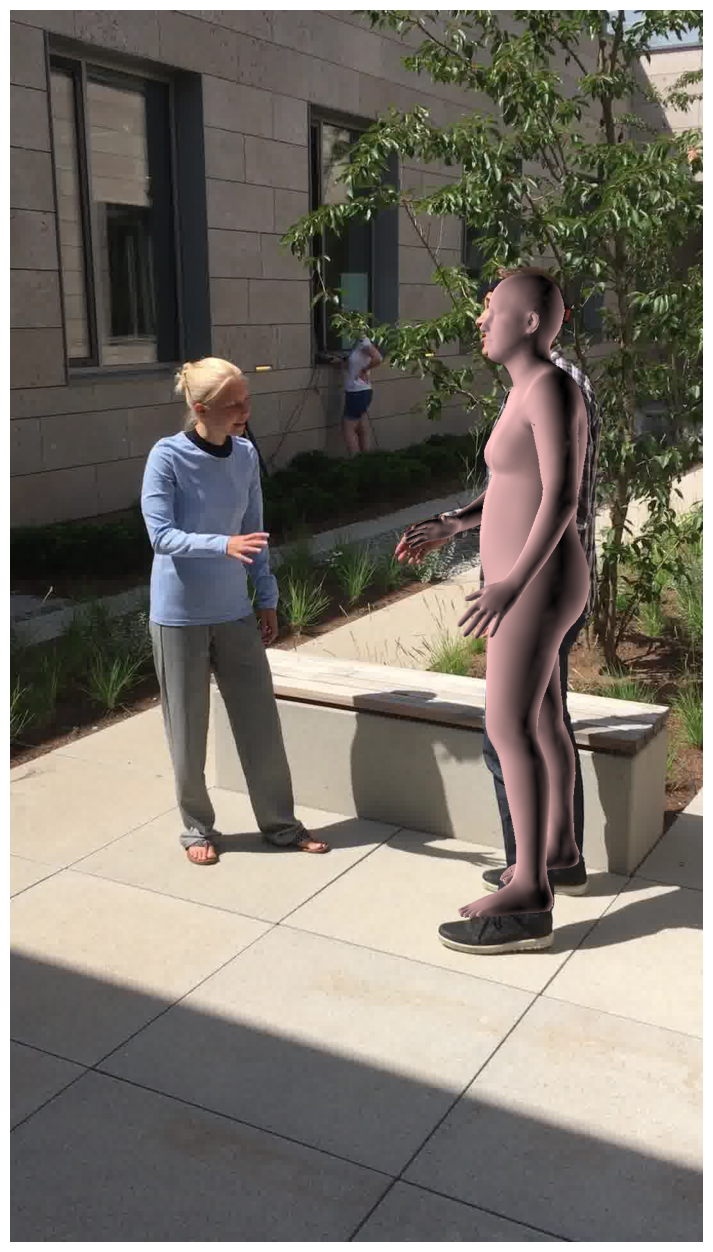

In [14]:
img_path = data['img_path'][0]
orig_img = to_tensor(Image.open(img_path))
rend_img = visualize_mesh(orig_img, betas, poses, cam_pose[0], cam_intr[0], trans)
plot_tensor(rend_img)